In [17]:
import numpy as np
from scipy.stats import linregress
import matplotlib.pyplot as plt
import seaborn as sns
import os
sns.set()


In [42]:
files=["Q500.txt","Q1000.txt","Q2000.txt","Q4000.txt","Q8000.txt"]
plt.close()
for val in os.:
    print("*"*100)
    print(val)
    f=open(val,"r")
    x,y=[],[]
    for thread,l in zip(range(10,800,10),f):
        x.append(int(thread))
        y.append(float(l.strip()))
        print(thread,l.strip())

****************************************************************************************************
Q500.txt
10 23.472280263900757
20 13.854527473449707
30 8.662935495376587
40 6.402513265609741
50 6.867888927459717
60 5.906640529632568
70 6.918304204940796
80 3.763901948928833
90 3.0088987350463867
100 3.7396867275238037
110 3.4532997608184814
120 3.463693857192993
130 3.629728317260742
140 8.213529586791992
150 7.848429203033447
160 10.387491941452026
170 9.429679155349731
180 11.767719745635986
190 6.091169834136963
200 2.6719374656677246
210 2.683119297027588
220 5.147320508956909
230 6.020395517349243
240 3.6172828674316406
250 0.09402608871459961
260 0.10318827629089355
270 0.08418726921081543
280 0.09967827796936035
290 0.11120176315307617
300 0.10202598571777344
310 0.10977840423583984
320 0.10017085075378418
330 0.15729951858520508
340 0.0987701416015625
350 0.13836956024169922
360 0.1159355640411377
370 0.14037537574768066
380 0.1038672924041748
390 0.12332367897033691
400 0

In [185]:
mintime=2
# -5.601e-08 x + 9.71e-05 x - 0.0686 x + 20.18
for x in range(10,800,10):
    #=3.789e-05 *pow(x,2) - 0.04182*pow(x,1)  + 10.96
    #y=-6.986e-08 *pow(x,3) + 0.0001217 *pow(x,2) - 0.06882 *pow(x,1) + 12.82
    y=-5.601e-08 *pow(x,3) + 9.71e-05 *pow(x,2) - 0.0686 *pow(x,1) + 20.18
    if y<mintime:
        print(x,y)
        break
    

600 1.8778400000000062


2000-2.txt


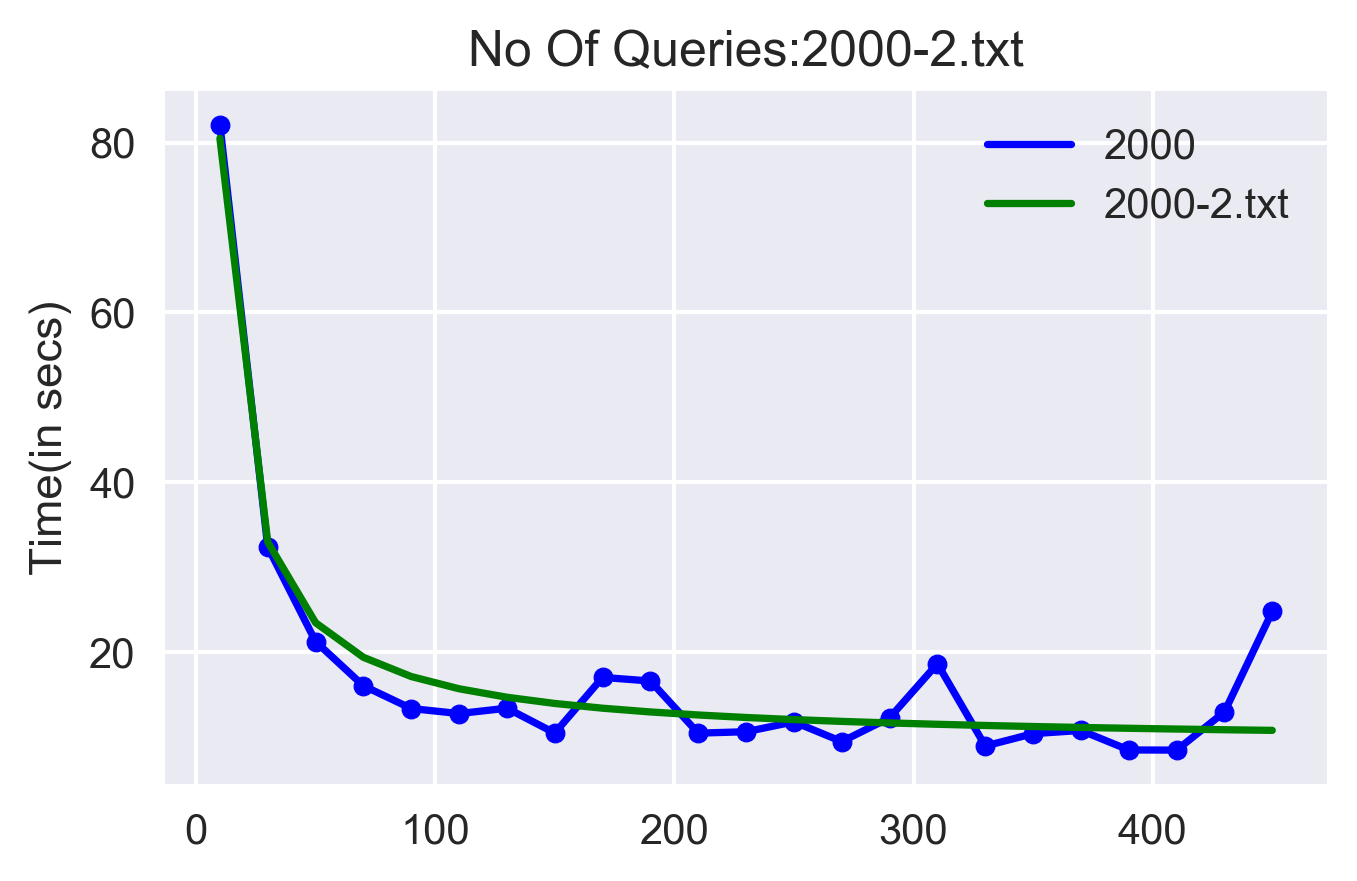

 
712.5 x + 9.242 [ 712.51195212    9.24153586] 12.8206907
4000.txt


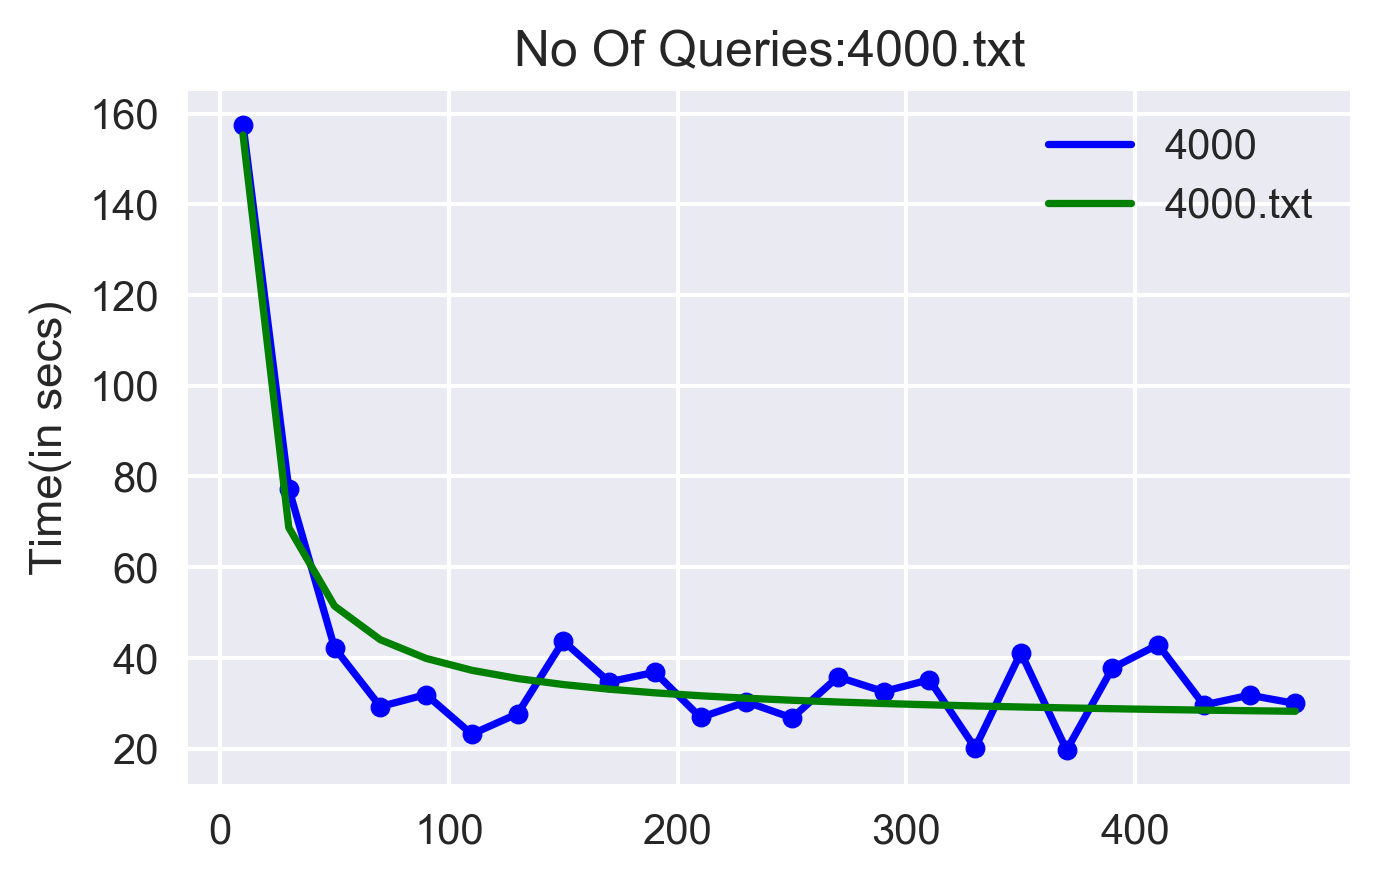

 
1298 x + 25.46 [ 1298.19664869    25.46029981] 12.8206907
5000.txt


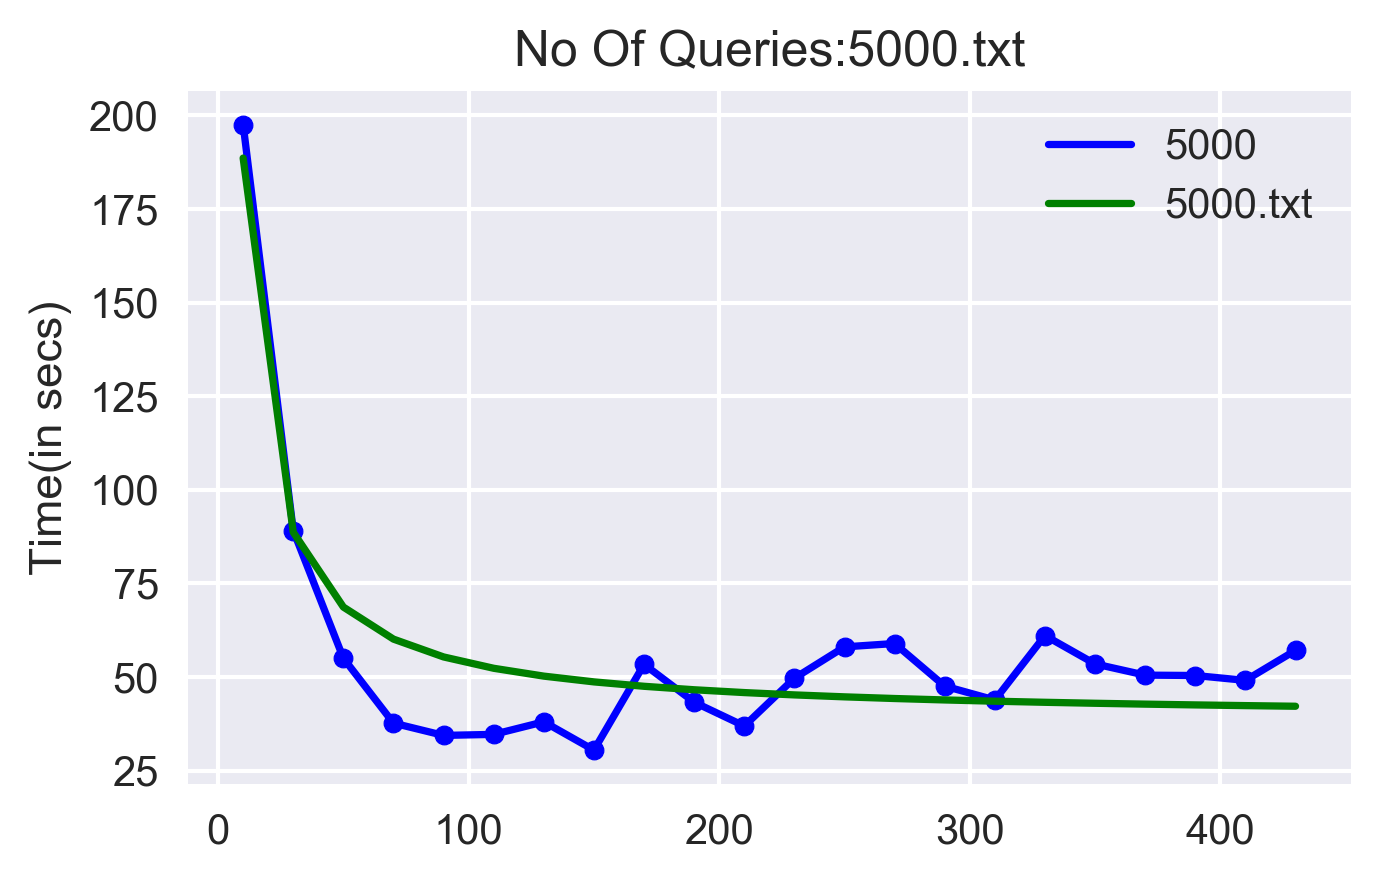

 
1499 x + 38.71 [ 1498.8575158     38.71031957] 12.8206907
7000-2.txt


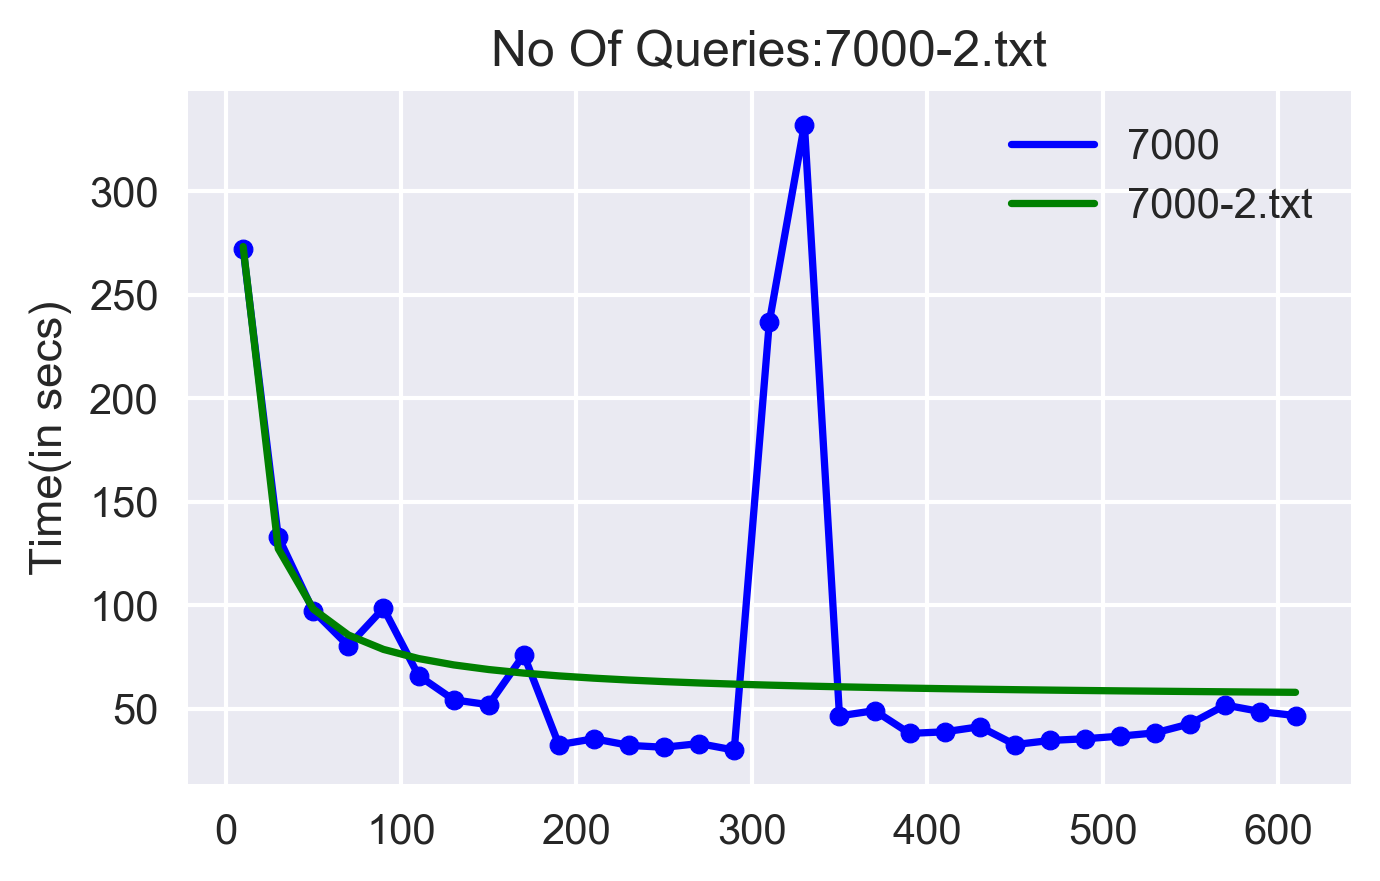

 
2189 x + 54.31 [ 2188.83431345    54.30781095] 12.8206907
7000-3.txt


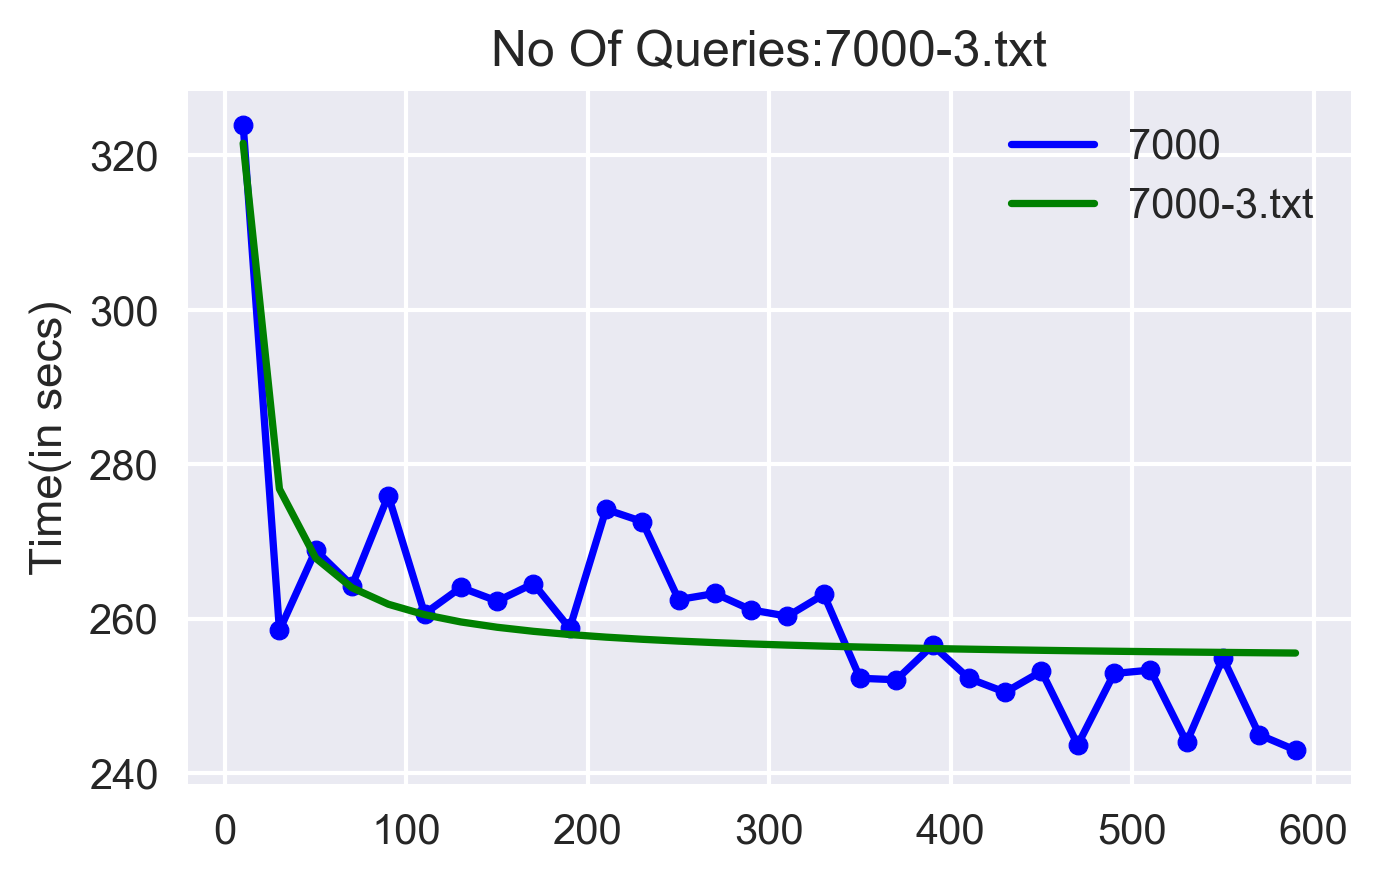

 
671.8 x + 254.4 [ 671.76163841  254.40313488] 12.8206907
7000No550.txt


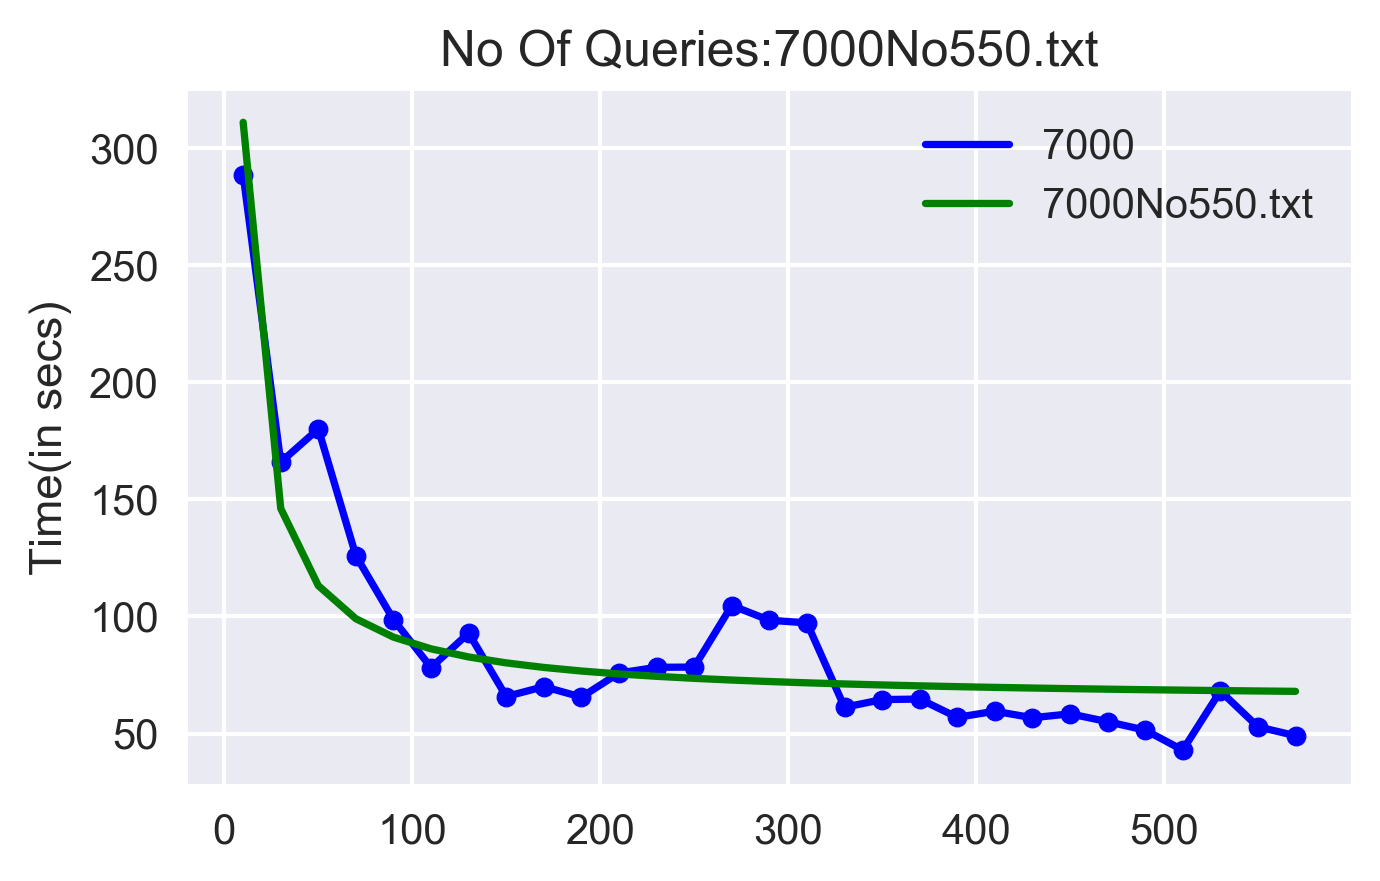

 
2474 x + 63.68 [ 2473.83045892    63.67988109] 12.8206907
8000-3.txt


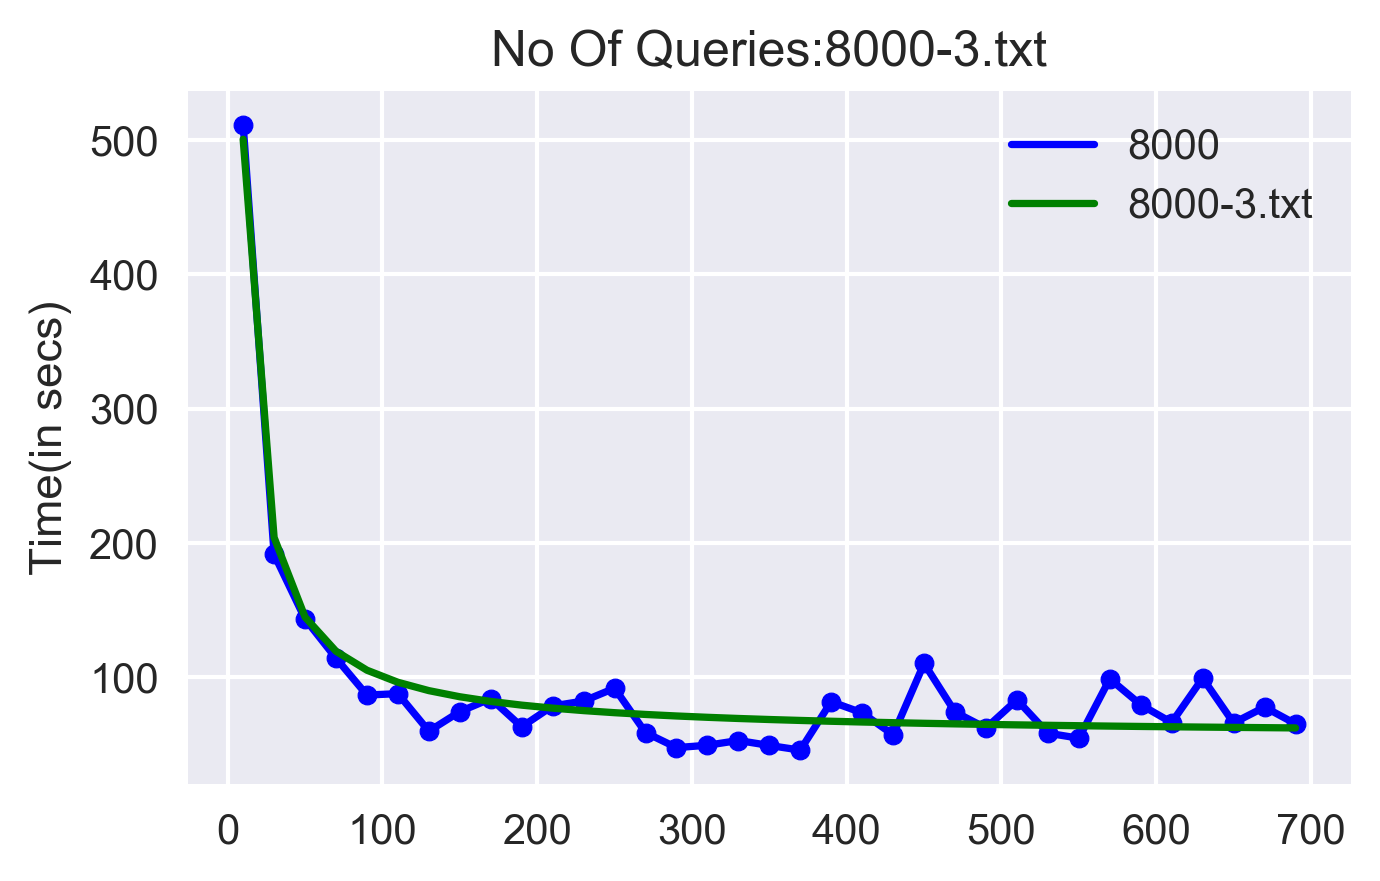

 
4446 x + 56 [ 4445.85928841    56.00011274] 12.8206907
8000-4.txt


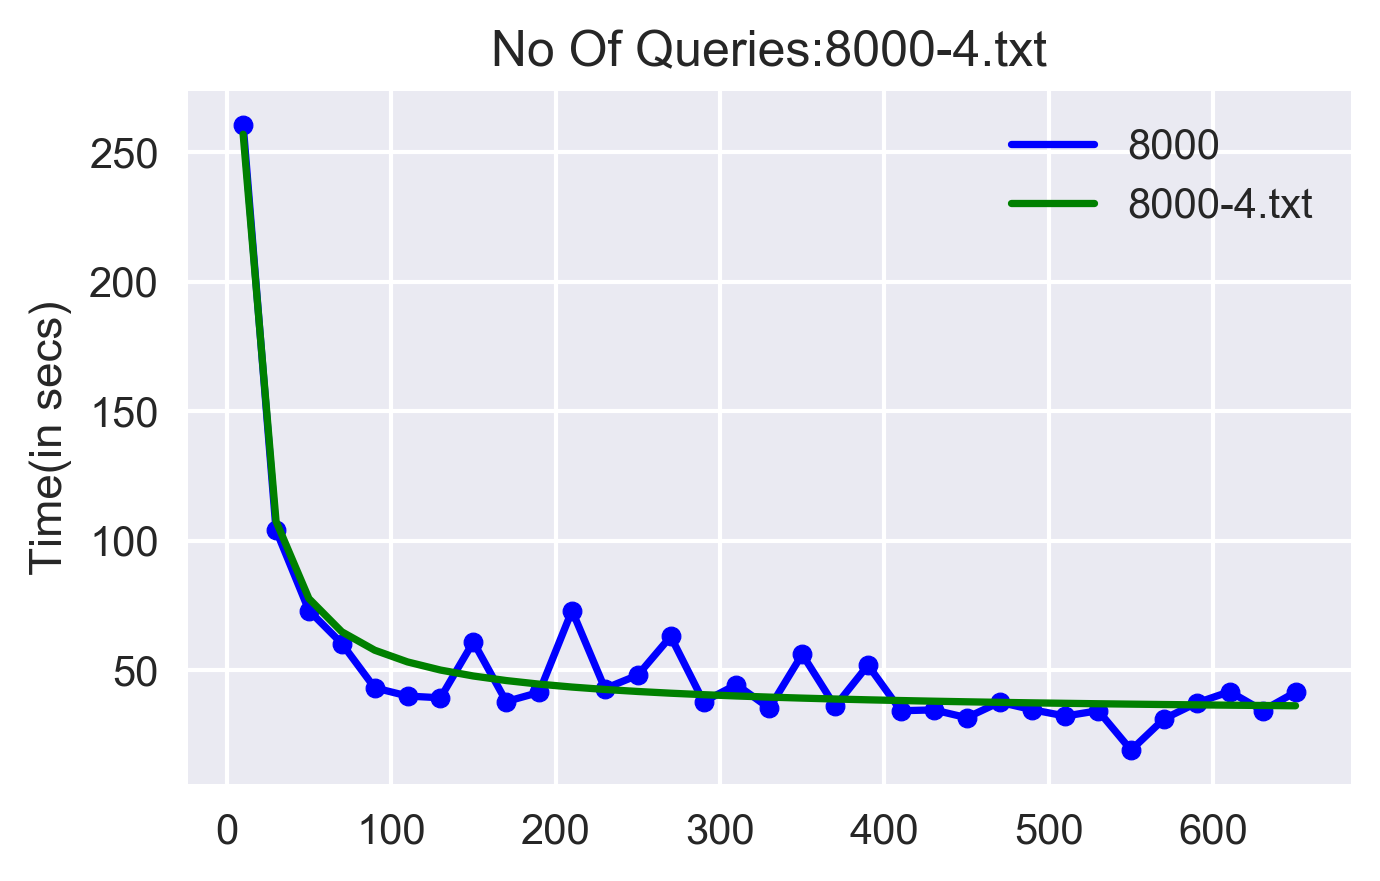

 
2244 x + 32.67 [ 2243.60502197    32.66714857] 12.8206907
8000.txt


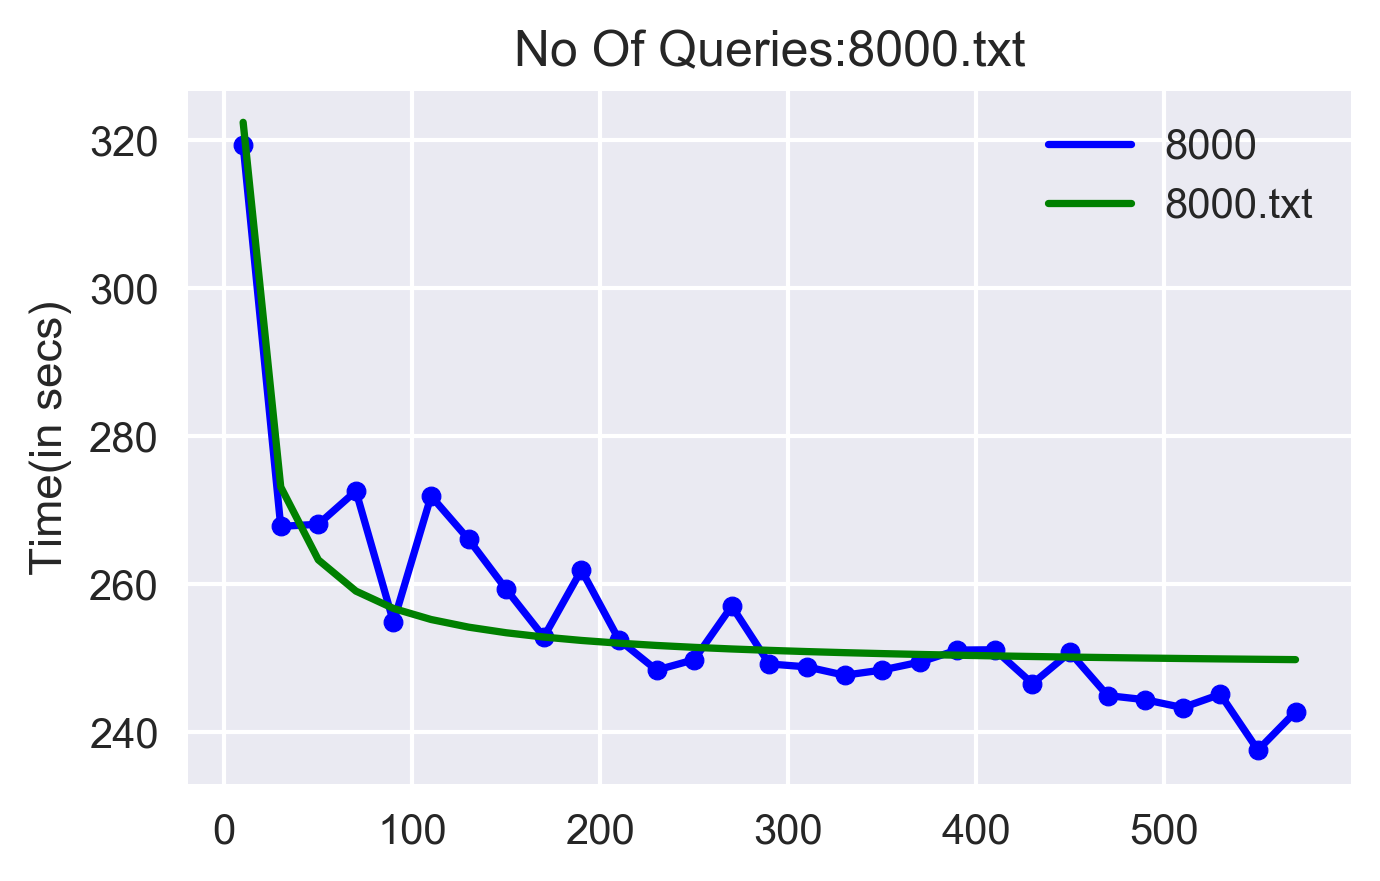

 
739.2 x + 248.5 [ 739.22941289  248.48703644] 12.8206907


In [73]:
#["Q500.txt","Q1000.txt","Q2000.txt","Q4000.txt","Q8000.txt"]
#["Q500.txt","Q1000.txt","Q2000.txt"]

def manageUspeed(uspeed,temp):
    if len(uspeed)>=2:
        del uspeed[0]
    if temp==0.0:
        return uspeed
    else:
        uspeed.append(temp)
        return uspeed


XX,YY,ZZ=[],[],[]
p,q,r=[],[],[]
A,B,C,D,Q=[],[],[],[],[]
alt_y,alt_x,alt_z=[],[],[]
files=["Q500.txt","Q1000.txt","Q2000.txt","Q4000.txt","Q8000.txt"]
plt.close()
sns.set()
path='data/'
 #os.listdir(path)
for val in os.listdir(path):
    f=open(path+val,"r")
    print(val)
    size=int(val[0:].split(".txt")[0][0:4])
    x,y,z,smoothWave,uspeed=[],[],[],[],[]
    
    for thread,l in zip(range(10,800,20),f):
        row=l.split(',')
        row=[float(i) for i in row]
        time=row[0]
        speed=row[1]
        #if speed!=0.0:
        x.append(1/thread)
        y.append(time)
        mspeed=manageUspeed(uspeed,speed)
        z.append(np.mean(mspeed)/(1024*10))
        
        #print("Time: ",time,"Speed",speed/1024,"MSpeed",mspeed,np.mean(mspeed)/1024)
       # print(mspeed,np.mean(mspeed)/1024)
        realTime=(357.61*size)/np.mean(mspeed)
        #print(time,realTime,time-realTime,"\n\n")
        smoothWave.append((357.61*size)/(time*1024))

        alt_y.append(thread)
        alt_x.append(size)
        alt_z.append(speed)
#         else:
#             if len(uspeed)!=0:
#                 del uspeed[0]
       
        
    plt.subplots(figsize=(5,3),dpi=300)      
    plt.plot([1/i for i in x],y,label=size,color='b')
    
    fit=np.polyfit(x,y,1)
    y_new=np.polyval(fit,x)

    for ii,jj in zip(x,y):
        XX.append(ii)
        YY.append(jj)
        ZZ.append(int(size))
        
    for ii,jj in zip(y,y_new):
        p.append(ii)
        q.append(jj)
        r.append(int(size))
        
    plt.plot([1/i for i in x],y_new,label=val,color='g')
   # plt.plot([1/i for i in x],z,label="speed",color='y')
    plt.scatter([1/i for i in x],y,s=20,color='b')
    #plt.plot([1/i for i in x],smoothWave,color='C2')
    #plt.xlabel("No of Threads")
    plt.ylabel("Time(in secs)")
    plt.legend(loc="upper right")
    plt.title("No Of Queries:"+val)
    plt.show()
    

    f.close()
    #print()
    f=np.poly1d(fit)
    print(f,f.coef,1.28206907e+01)
    yy=f.coef
    A.append(yy[0])
    B.append(yy[1])
#     C.append(yy[2])
#     D.append(yy[3])
    Q.append(int(size))

In [197]:
# -6.986e-08 x + 0.0001217 x - 0.06882 x + 12.82
xx=486.75
# y
-6.986e-08*pow(xx,3)+0.0001217*pow(xx,2)- 0.06882*xx+12.82

#2*0.0001217
## y''
#6*-6.986e-08 *xx+2*0.0001217
#5e2

500.0

In [84]:

reg.fit ([[1/i] for i in y], [1/i for i in x])
print(reg.coef_)
print(reg.intercept_ )

linregress([1/i for i in y],[1/i for i in x])

reg.fit ([[i,j] for i,j in zip(z,smoothWave)], [i for i in y])
print(reg.coef_)
print(reg.intercept_ )

[ 651337.15089633]
-2269.20335529
[  0.95761081 -26.55674244]
543.862895058


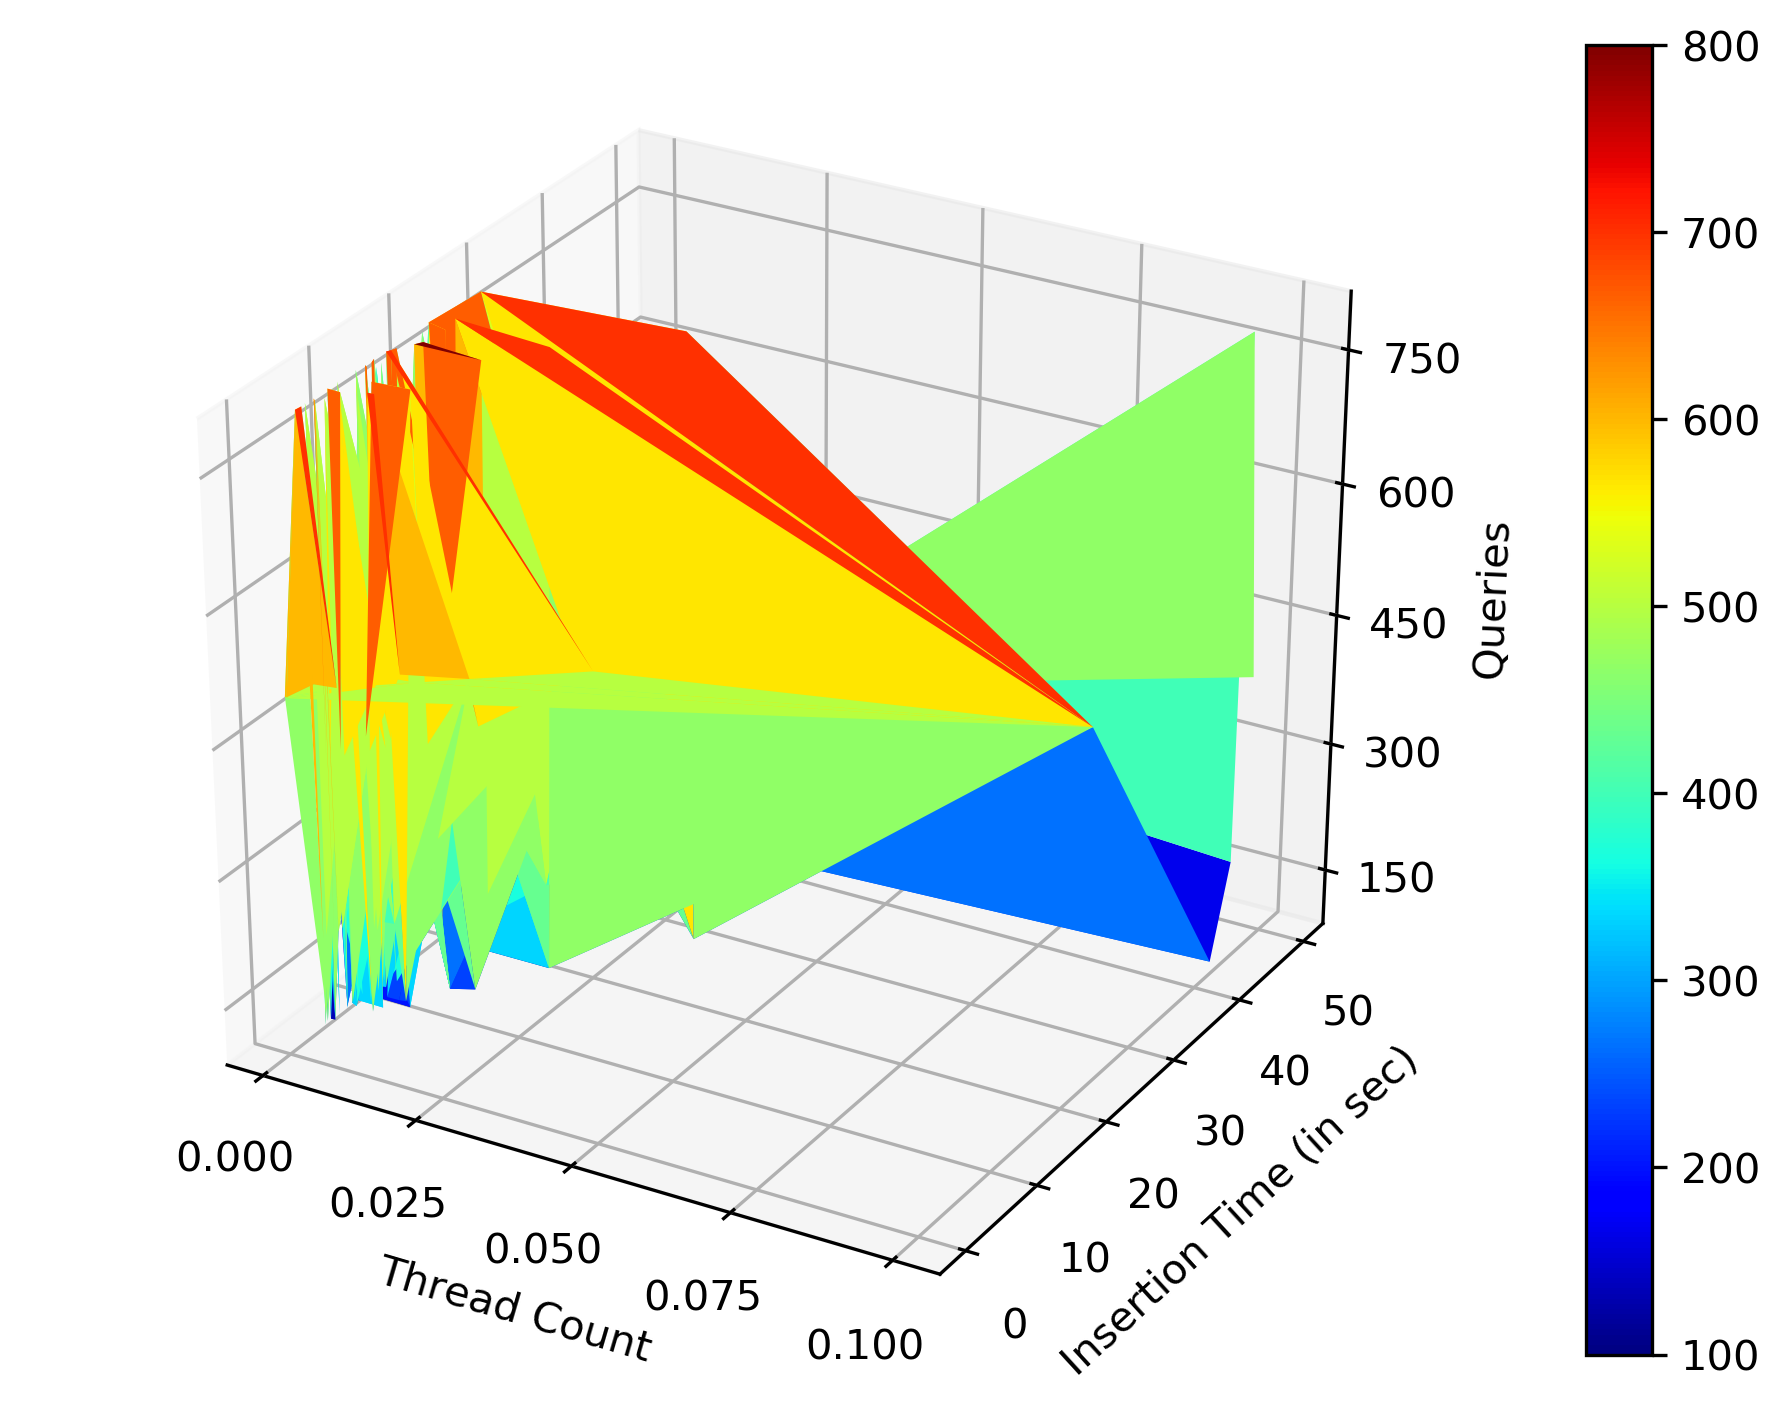

RuntimeError: Error in qhull Delaunay triangulation calculation: singular input data (exitcode=2); use python verbose option (-v) to see original qhull error.

In [20]:
# Thread count, Insertion Time, Queries

import sys

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

import numpy
from numpy.random import randn
from scipy import array, newaxis


def plot3D(XX,YY,ZZ,xlabel,ylabel,zlabel):
    sns.reset_defaults()
    DATA=[]
    for i,j,k in zip(XX,YY,ZZ):
        DATA.append([i,j,k])
    DATA=np.array(DATA)
    Xs = DATA[:,0]
    Ys = DATA[:,1]
    Zs = DATA[:,2]


    # ======
    ## plot:

    fig = plt.figure(dpi=300)

    ax = fig.add_subplot(111, projection='3d')

    surf = ax.plot_trisurf(Xs, Ys, Zs, cmap=cm.jet, linewidth=0)
    fig.colorbar(surf)

    ax.xaxis.set_major_locator(MaxNLocator(5))
    ax.yaxis.set_major_locator(MaxNLocator(6))
    ax.zaxis.set_major_locator(MaxNLocator(5))
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_zlabel(zlabel)
    fig.tight_layout()

    plt.show()

plot3D(XX,YY,ZZ,"Thread Count","Insertion Time (in sec)","Queries")
plot3D(alt_y,alt_z,alt_x,"Thread Count","Speed (in B/sec))","Queries")



In [63]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
print(x,Q)
reg.fit ([[i,j] for i,j in zip(smoothWave,alt_x)], [1/i for i in x])
print(reg.coef_)
print(reg.intercept_ )

X,Y,Z=[],[],[]
for speed in range(1000,1000000,1000):
    for query in range(2000,3000,1000):
        y=reg.coef_[0]*speed+reg.coef_[1]*query+reg.intercept_
        X.append(query)
        Y.append(y)
        Z.append(speed)
        print(y,query,speed)

plot3D(Z,Y,X,"Speed","Threads","Query")

[0.1, 0.03333333333333333, 0.02, 0.014285714285714285, 0.011111111111111112, 0.00909090909090909, 0.007692307692307693, 0.006666666666666667, 0.0058823529411764705, 0.005263157894736842, 0.004761904761904762, 0.004347826086956522, 0.004, 0.003703703703703704, 0.0034482758620689655, 0.0032258064516129032, 0.0030303030303030303, 0.002857142857142857, 0.002702702702702703, 0.002564102564102564, 0.0024390243902439024, 0.002325581395348837, 0.0022222222222222222, 0.002127659574468085, 0.0020408163265306124, 0.00196078431372549, 0.0018867924528301887, 0.0018181818181818182, 0.0017543859649122807] [2000, 4000, 5000, 7000, 7000, 7000, 8000, 8000, 8000]
[  1.74448420e+02   8.76676650e-02]
-1836.59790582
172787.157347 2000 1000
347235.57727 2000 2000
521683.997193 2000 3000
696132.417115 2000 4000
870580.837038 2000 5000
1045029.25696 2000 6000
1219477.67688 2000 7000
1393926.09681 2000 8000
1568374.51673 2000 9000
1742822.93665 2000 10000
1917271.35658 2000 11000
2091719.7765 2000 12000
2266168

77104540.3433 2000 442000
77278988.7632 2000 443000
77453437.1832 2000 444000
77627885.6031 2000 445000
77802334.023 2000 446000
77976782.4429 2000 447000
78151230.8629 2000 448000
78325679.2828 2000 449000
78500127.7027 2000 450000
78674576.1226 2000 451000
78849024.5425 2000 452000
79023472.9625 2000 453000
79197921.3824 2000 454000
79372369.8023 2000 455000
79546818.2222 2000 456000
79721266.6422 2000 457000
79895715.0621 2000 458000
80070163.482 2000 459000
80244611.9019 2000 460000
80419060.3218 2000 461000
80593508.7418 2000 462000
80767957.1617 2000 463000
80942405.5816 2000 464000
81116854.0015 2000 465000
81291302.4215 2000 466000
81465750.8414 2000 467000
81640199.2613 2000 468000
81814647.6812 2000 469000
81989096.1012 2000 470000
82163544.5211 2000 471000
82337992.941 2000 472000
82512441.3609 2000 473000
82686889.7808 2000 474000
82861338.2008 2000 475000
83035786.6207 2000 476000
83210235.0406 2000 477000
83384683.4605 2000 478000
83559131.8805 2000 479000
83733580.3004 2

RuntimeError: Error in qhull Delaunay triangulation calculation: singular input data (exitcode=2); use python verbose option (-v) to see original qhull error.

[712.51195212419009, 1298.1966486880983, 1498.857515803074, 2188.8343134473848, 671.76163840727634, 2473.8304589190352, 4445.859288407948, 2243.6050219685308, 739.2294128925214] [9.2415358588723358, 25.46029980612855, 38.710319565690909, 54.307810949248122, 254.40313487640873, 63.679881089611634, 56.000112740269003, 32.667148572374856, 248.48703643773931] [2000, 4000, 5000, 7000, 7000, 7000, 8000, 8000, 8000]
[(0.27085395193564021, 122.76277136246722), (0.020984395870095904, -43.574320981003041)]
10.0 1000 16.7717472189
30.0 1000 -9.46936766764
50.0 1000 -14.7175906449
70.0 1000 -16.9668290638
90.0 1000 -18.2164059632
110.0 1000 -19.0115912627
130.0 1000 -19.5621041625
150.0 1000 -19.9658136223
170.0 1000 -20.2745326209
190.0 1000 -20.5182581462
209.99999999999997 1000 -20.7155597619
230.0 1000 -20.8785480531
250.0 1000 -21.0154582177
270.0 1000 -21.132085395
290.0 1000 -21.2326260651
310.0 1000 -21.3201937454
330.0 1000 -21.3971471615
350.0 1000 -21.4653059015
370.0 1000 -21.526096129

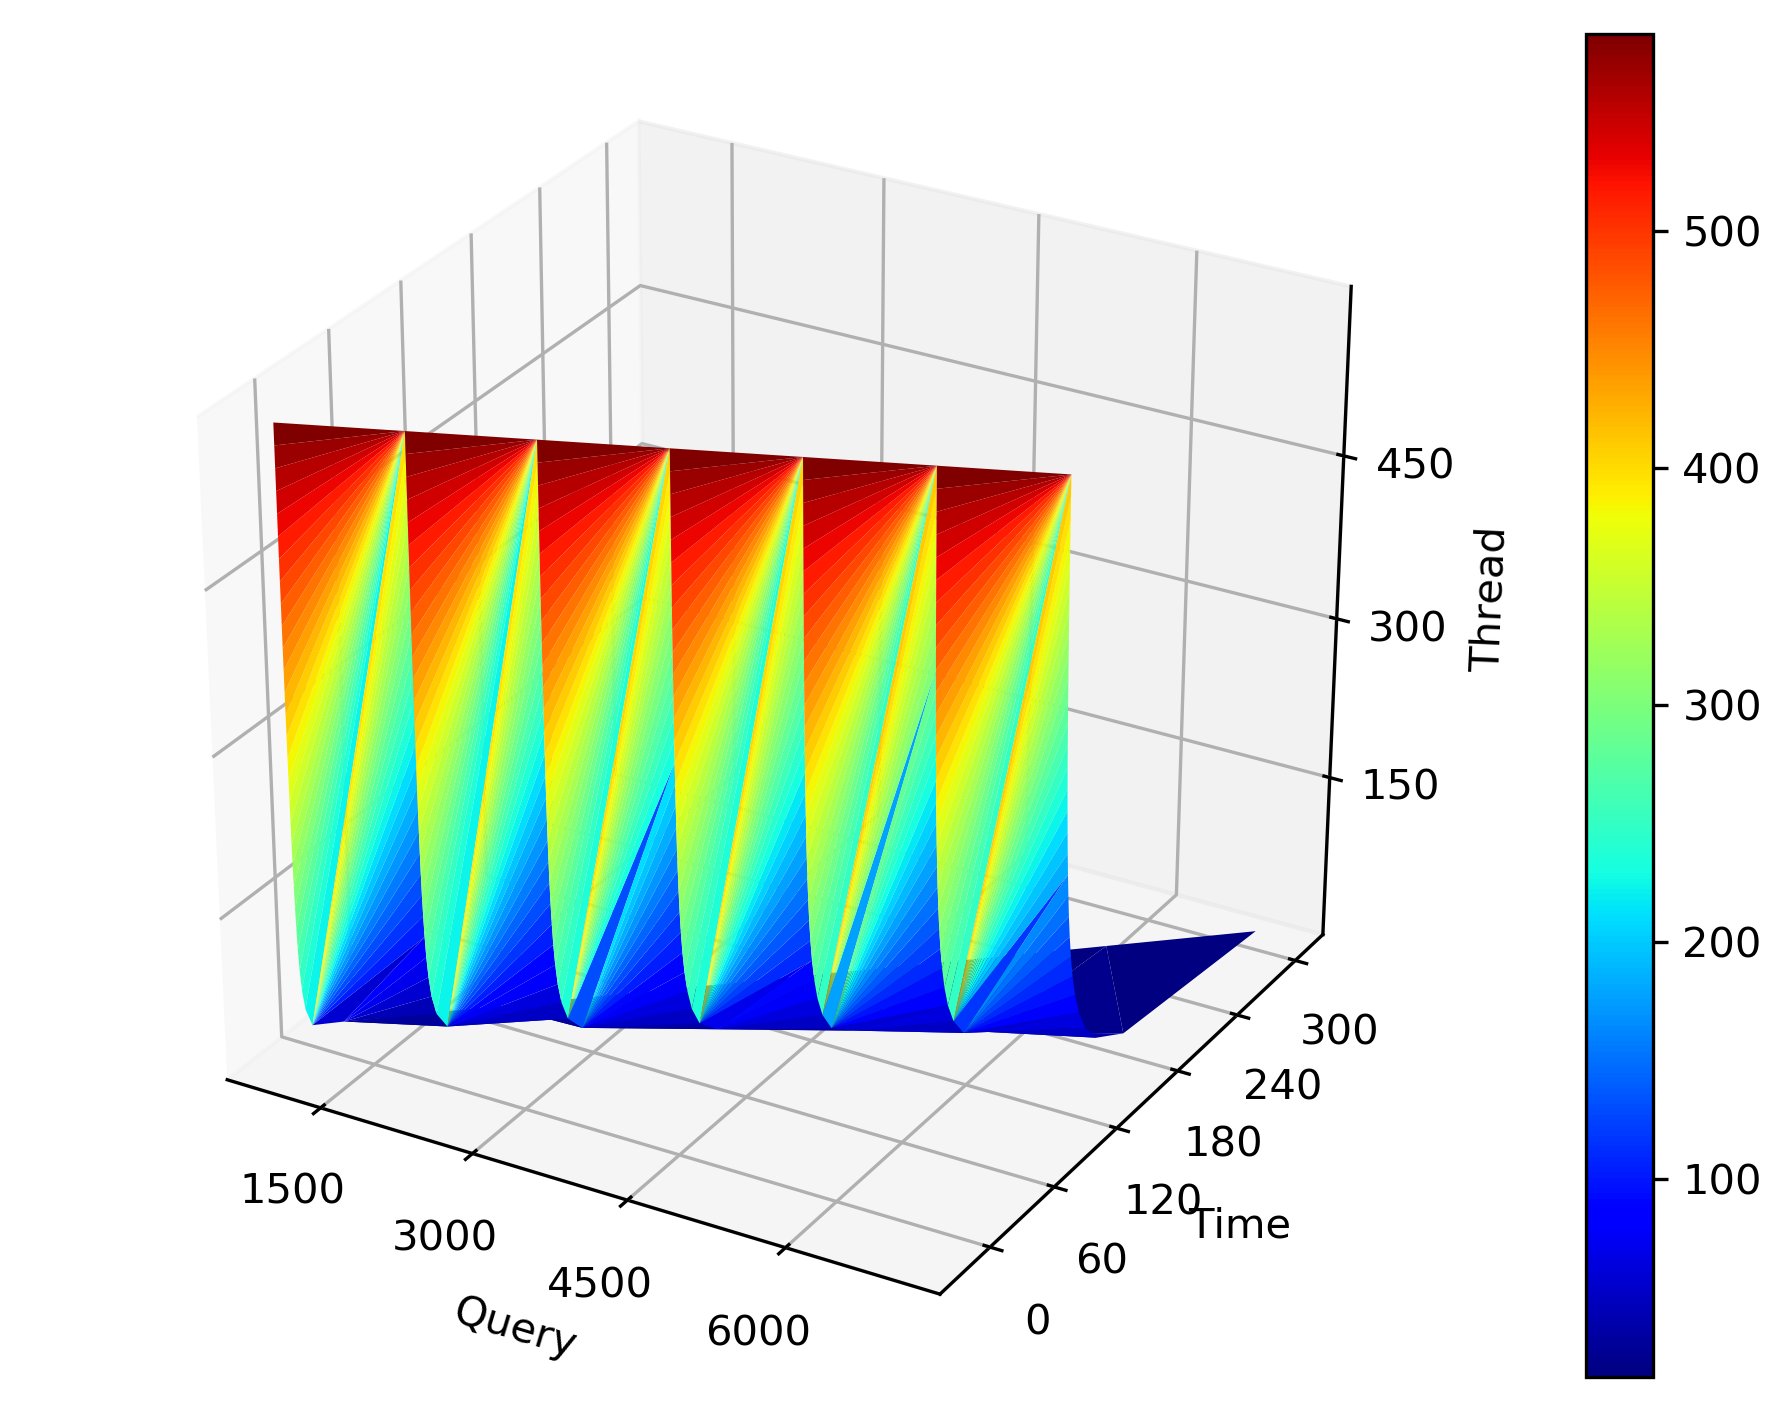

In [48]:
from scipy.stats import linregress

print(A,B,Q)
tdata=[]
y=linregress(Q,A)
tdata.append((y.slope,y.intercept))
y=linregress(Q,B)
tdata.append((y.slope,y.intercept))
# y=linregress(Q,C)
# tdata.append((y.slope,y.intercept))
# y=linregress(Q,D)
# tdata.append((y.slope,y.intercept))

print(tdata)
X,Y,Z=[],[],[]

for query in range(1000,8000,1000):
    for thread in range(10,600,20):
        summ=0
        for i,power in zip(tdata,range(1,-1,-1)):
            thread=1/thread
            summ=summ+(i[0]*query+i[1])*pow(thread,power)
            #print(thread,power)
        print(thread,query,summ)
        Y.append(summ)
        X.append(query)
        Z.append(thread)
 
                           
plot3D(X,Y,Z,"Query","Time","Thread")
# var=[]
# for i in tdata:
#     var.append(i[0]*1000+i[1])
# print(var)    

# mintime=0.2
# for x in range(10,800,10):
#     #=3.789e-05 *pow(x,2) - 0.04182*pow(x,1)  + 10.96
#     y=-5.7803728069279393e-08 *pow(x,3) + 0.00010673087790926715 *pow(x,2) -0.072188237623407481 *pow(x,1) + 18.458033398648148
#     if y<mintime:
#         print(x,y)
#         break
        
#-5.601e-08 x + 9.71e-05 x - 0.0686 x + 20.18
for q,a,b,c,d in zip(Q,A,B,C,D):
    print(q,a,b,c,d)

In [25]:
print(tdata)
import numpy as np
import statsmodels.api as sm

def reg_m(y, x):
    ones = np.ones(len(x[0]))
    X = sm.add_constant(np.column_stack((x[0], ones)))
    for ele in x[1:]:
        X = sm.add_constant(np.column_stack((ele, X)))
    results = sm.OLS(y, X).fit()
    return results

print (reg_m(p, [q,r]).summary())

[(-1.1214643321067188e-09, -7.903243221238538e-08), (9.4246849572499566e-07, 0.0001336664882198961), (-0.00024680157377579396, -0.042426682652380032), (0.037735320709618742, -10.546077871640762)]


c:\program files (x86)\python36-32\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     1491.
Date:                Wed, 25 Apr 2018   Prob (F-statistic):          1.18e-161
Time:                        19:01:28   Log-Likelihood:                -1514.9
No. Observations:                 319   AIC:                             3036.
Df Residuals:                     316   BIC:                             3047.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1         -2.393e-17      0.001  -3.25e-14      1.0

In [143]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit ([[i,j] for i,j in zip(q,r)], p)
print(reg.coef_)
reg.intercept_ 

[  1.00000000e+00   5.46729554e-18]


8.8817841970012523e-16

In [154]:



reg.fit ([[i,j] for i,j in zip(q,r)], p)
print(reg.coef_)
reg.intercept_ 

LinregressResult(slope=0.0025456981651638209, intercept=2.0752895100788411, rvalue=0.28460419969178469, pvalue=9.7752796437199748e-06, stderr=0.00056296251038511001)
[  1.00000000e+00   5.46729554e-18]


8.8817841970012523e-16

In [127]:
from scipy.optimize import curve_fit
import scipy

def fn(x, a, b, c):
    return a + b*x[0] + c*x[1]

# y(x0,x1) data:
#    x0=0 1 2
# ___________
# x1=0 |0 1 2
# x1=1 |1 2 3
# x1=2 |2 3 4

x = scipy.array([q,r])
y = scipy.array(p)
popt, pcov = curve_fit(fn, x, y)
print (popt,pcov)

[  3.86419160e-08   9.99999981e-01   4.52208271e-11] [[  2.47610861e-02  -2.21691457e-03  -1.35200938e-05]
 [ -2.21691457e-03   2.91594811e-03  -6.52980420e-06]
 [ -1.35200938e-05  -6.52980420e-06   5.81986986e-08]]


In [146]:
for i,j,k in zip(q,r,p):
    print(i,j,"-->",k)



12.1445944481 500 --> 23.472280263900757
11.4924230333 500 --> 13.854527473449707
10.8637572648 500 --> 8.662935495376587
10.2581779774 500 --> 6.402513265609741
9.67526600614 500 --> 6.867888927459717
9.11460218575 500 --> 5.906640529632568
8.57576735113 500 --> 6.918304204940796
8.05834233715 500 --> 3.763901948928833
7.56190797868 500 --> 3.0088987350463867
7.08604511057 500 --> 3.7396867275238037
6.6303345677 500 --> 3.4532997608184814
6.19435718492 500 --> 3.463693857192993
5.77769379711 500 --> 3.629728317260742
5.37992523913 500 --> 8.213529586791992
5.00063234584 500 --> 7.848429203033447
4.6393959521 500 --> 10.387491941452026
4.29579689279 500 --> 9.429679155349731
3.96941600277 500 --> 11.767719745635986
3.6598341169 500 --> 6.091169834136963
3.36663207004 500 --> 2.6719374656677246
3.08939069707 500 --> 2.683119297027588
2.82769083285 500 --> 5.147320508956909
2.58111331224 500 --> 6.020395517349243
2.3492389701 500 --> 3.6172828674316406
2.13164864131 500 --> 0.09402608871

In [203]:
Z

[500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 

In [34]:
f=open("text.txt","w")
for i in range(0,2000):
    f.write(str(55555555)+"\n")
f.close()